In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os
import random
import seaborn as sb
import pathlib

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from zipfile import ZipFile
from sklearn.metrics import confusion_matrix

#Extracting data from the zip file

In [ ]:
# extracting our data
zip_ref=ZipFile("/content/drive/MyDrive/data/10_food_classes_all_data.zip",'r')
zip_ref.extractall()

In [ ]:
# lets explore the directory
for path,dir,filename in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dir)} directories and {len(filename)} images in '{path}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ha

In [ ]:
# path of our data
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"


#Preprocessing and loading the data

In [ ]:
# shape of the images to be passed as input to our network
shape = (224, 224)
# training data is passed as batches of size 32 to the network
batch_size = 32


In [ ]:
# preparing training set
print("Training images:")
training_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                  image_size=shape,
                                                  batch_size=batch_size,
                                                  label_mode="categorical",
                                                  shuffle=True
                                                  )


Training images:
Found 7500 files belonging to 10 classes.


In [ ]:
training_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
print("Testing images:")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                              image_size=shape,
                                              batch_size=batch_size,
                                              label_mode="categorical",
                                              shuffle=False)

Testing images:
Found 2500 files belonging to 10 classes.


In [ ]:
class_names=training_data.class_names

In [ ]:
# lets create true class labels of our test set
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Visualizing our data

plot_image function below displays a random image from the train or test set based on the argument passed

--> if train arg is true a random image from train set is displayed else a random image from test set is displayed

In [ ]:
# lets visualize different images
def plot_image(train,class_names):
  label=random.sample(class_names,1)
  if train:
    target_folder=train_dir+"/"+label[0]
  else:
    target_folder=test_dir+"/"+label[0]
  img=random.sample(os.listdir(target_folder),1)
  img=plt.imread(target_folder+"/"+img[0])
  plt.imshow(img)
  plt.axis("off")
  plt.title(label)
  print(img.shape)

(384, 512, 3)


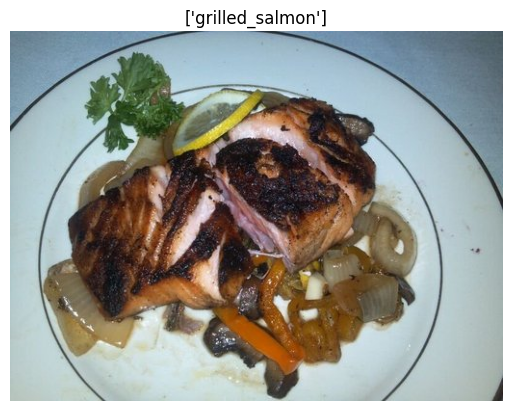

In [ ]:
plot_image(True,class_names)

(384, 512, 3)


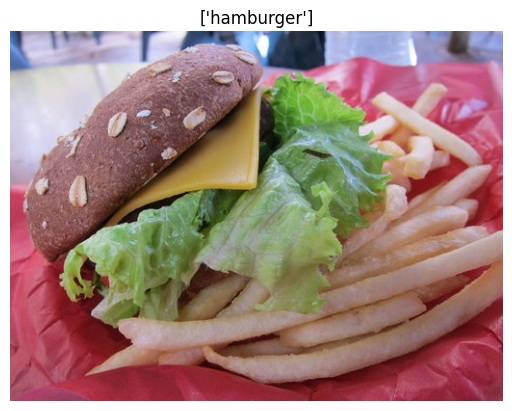

In [ ]:
plot_image(False,class_names)

<h1>A Baseline model:</h1>

In [ ]:
baseline_model=Sequential([
    layers.Conv2D(32,3,activation="relu",input_shape=(224,224,3)),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(16,3,activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(16,3,activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(4056,activation="relu"),
    layers.Dense(2028,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [ ]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

In [ ]:
# compiling the model
baseline_model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
# creating an early stopping callbacks
callbacks=tf.keras.callbacks.EarlyStopping(
                            monitor="val_loss",
                            patience=3,
                            verbose=0,
                            restore_best_weights=False,
                            start_from_epoch=0)

In [ ]:
# training the model
base_model_history=baseline_model.fit(training_data,
                    epochs=30,
                    steps_per_epoch=len(training_data),
                    validation_data=test_data,
                    validation_steps=int(len(test_data)),
                    callbacks=[callbacks])

Epoch 1/30
235/235 [==============================] - 38s 103ms/step - loss: 28.2762 - accuracy: 0.1749 - val_loss: 2.1396 - val_accuracy: 0.2300
Epoch 2/30
235/235 [==============================] - 25s 103ms/step - loss: 1.8916 - accuracy: 0.3384 - val_loss: 2.2503 - val_accuracy: 0.2468
Epoch 3/30
235/235 [==============================] - 24s 102ms/step - loss: 1.0506 - accuracy: 0.6491 - val_loss: 3.0356 - val_accuracy: 0.2200
Epoch 4/30
235/235 [==============================] - 25s 104ms/step - loss: 0.4269 - accuracy: 0.8680 - val_loss: 3.9500 - val_accuracy: 0.2068


<h3>Comparing training accuracy and validation accuracy</h3>

In [ ]:
base_model_res=pd.DataFrame(base_model_history.history)
base_model_res

,loss,accuracy,val_loss,val_accuracy
0,28.276205,0.174933,2.139572,0.2300
1,1.891649,0.338400,2.250269,0.2468
2,1.050609,0.649067,3.035601,0.2200
3,0.426880,0.868000,3.949953,0.2068


<Axes: >

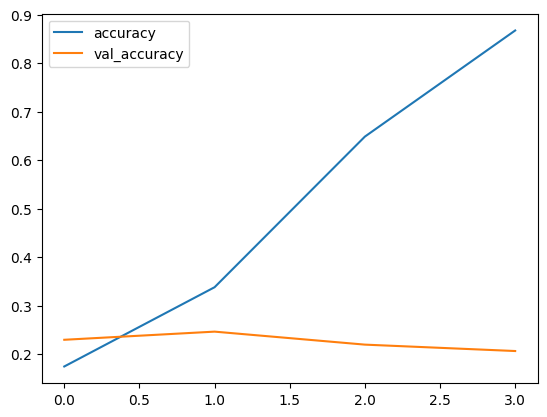

In [ ]:
base_model_res[["accuracy","val_accuracy"]].plot()

<Axes: >

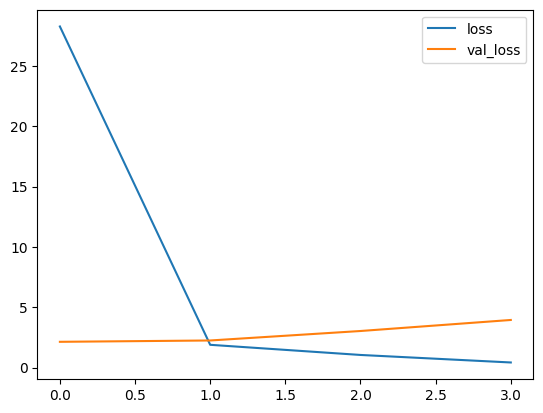

In [ ]:
base_model_res[["loss","val_loss"]].plot()

<Axes: >

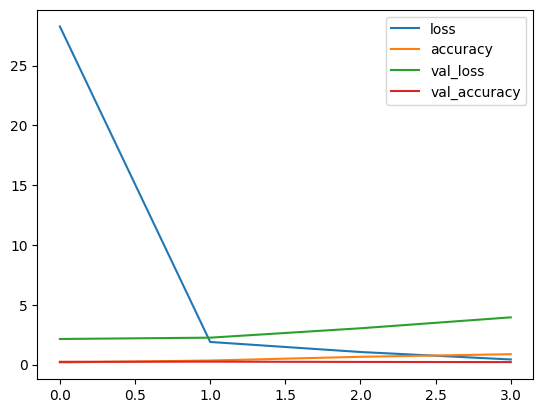

In [ ]:
base_model_res.plot()

<h1><b>We can notice our model is overfitting over the training data</b><h1>

#Lets use transfer learning.

---



---



Here we use prebuilt efficientnet model and fine tune it to our data

<h3>Performing augmentation:</h3>
By performing augmentation we can get more data that can be used to train our model

In [ ]:
# creating data augumenetation layer
data_augumentation=keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomHeight(0.2),
    keras.layers.RandomWidth(0.2),
  ], name ="data_augmentation")

Lets visualize data before and after augumentation

Text(0.5, 1.0, 'Augmented image')

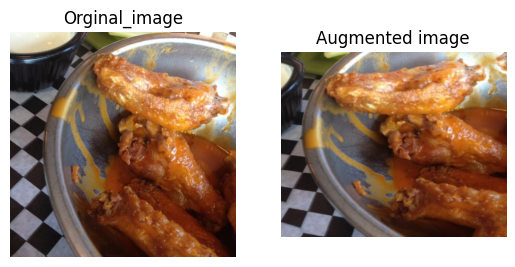

In [ ]:
# lets visualize orginal image and its augumented image
label=random.sample(class_names,1)
target_folder=train_dir+"/"+label[0]
samp_img=random.sample(os.listdir(target_folder),1)
samp_img=plt.imread(target_folder+"/"+samp_img[0])
plt.subplot(1,2,1)
plt.imshow(samp_img)
plt.axis("off")
plt.title("Orginal_image")
samp_img=samp_img*(1./255)
augmented_image=data_augumentation(samp_img)
plt.subplot(1,2,2)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Augmented image")

<h2>Lets import efficientnet_v2 model from tensorflow library</h3>

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False



16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_1[0][0]']            
 )                              3)                                                   

#Building our model without data augumentation

In [ ]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Compiling the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model1_history = model_1.fit(training_data,
                    epochs=30,
                    steps_per_epoch=len(training_data),
                    validation_data=test_data,
                    validation_steps=int(len(test_data)),
                    callbacks=[callbacks]
                    )

Epoch 1/30
235/235 [==============================] - 37s 120ms/step - loss: 0.8200 - accuracy: 0.7745 - val_loss: 0.3982 - val_accuracy: 0.8932
Epoch 2/30
235/235 [==============================] - 26s 109ms/step - loss: 0.4472 - accuracy: 0.8683 - val_loss: 0.3259 - val_accuracy: 0.9104
Epoch 3/30
235/235 [==============================] - 26s 107ms/step - loss: 0.3747 - accuracy: 0.8879 - val_loss: 0.2976 - val_accuracy: 0.9164
Epoch 4/30
235/235 [==============================] - 26s 106ms/step - loss: 0.3303 - accuracy: 0.9025 - val_loss: 0.2822 - val_accuracy: 0.9192
Epoch 5/30
235/235 [==============================] - 25s 107ms/step - loss: 0.2973 - accuracy: 0.9116 - val_loss: 0.2754 - val_accuracy: 0.9176
Epoch 6/30
235/235 [==============================] - 25s 106ms/step - loss: 0.2713 - accuracy: 0.9208 - val_loss: 0.2695 - val_accuracy: 0.9188
Epoch 7/30
235/235 [==============================] - 26s 108ms/step - loss: 0.2493 - accuracy: 0.9272 - val_loss: 0.2667 - val_ac

In [ ]:
model1_res=pd.DataFrame(model1_history.history)
model1_res

,loss,accuracy,val_loss,val_accuracy
0,0.819984,0.774533,0.398169,0.8932
1,0.447210,0.868267,0.325930,0.9104
2,0.374654,0.887867,0.297649,0.9164
3,0.330254,0.902533,0.282199,0.9192
4,0.297311,0.911600,0.275430,0.9176
5,0.271288,0.920800,0.269523,0.9188
6,0.249334,0.927200,0.266717,0.9180
7,0.230283,0.935333,0.263115,0.9176
8,0.214512,0.940133,0.261810,0.9188
9,0.199327,0.947067,0.263843,0.9184


<Axes: >

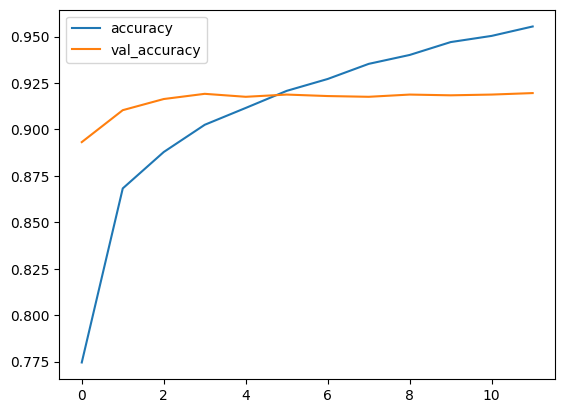

In [ ]:
model1_res[["accuracy","val_accuracy"]].plot()

<Axes: >

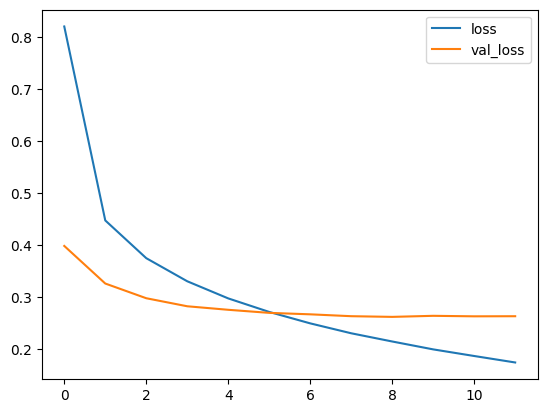

In [ ]:
model1_res[["loss","val_loss"]].plot()

<Axes: >

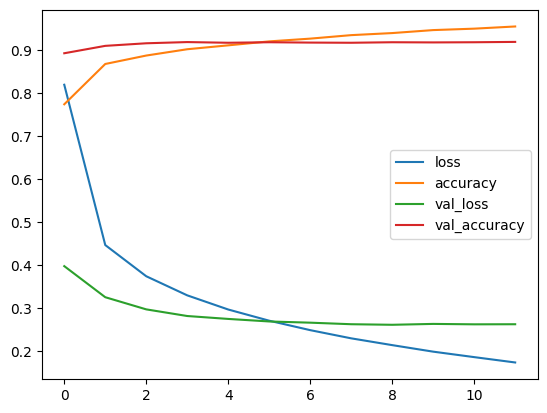

In [ ]:
model1_res.plot()

#Building our model with data augumentation

In [ ]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augumentation(inputs)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Compiling the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model2_history = model_2.fit(training_data,
                    epochs=30,
                    steps_per_epoch=len(training_data),
                    validation_data=test_data,
                    validation_steps=int(len(test_data)),
                    callbacks=[callbacks]
                    )

Epoch 1/30
235/235 [==============================] - 34s 114ms/step - loss: 0.8143 - accuracy: 0.7680 - val_loss: 0.4008 - val_accuracy: 0.8936
Epoch 2/30
235/235 [==============================] - 25s 106ms/step - loss: 0.4466 - accuracy: 0.8675 - val_loss: 0.3274 - val_accuracy: 0.9052
Epoch 3/30
235/235 [==============================] - 25s 105ms/step - loss: 0.3730 - accuracy: 0.8899 - val_loss: 0.3030 - val_accuracy: 0.9108
Epoch 4/30
235/235 [==============================] - 26s 107ms/step - loss: 0.2966 - accuracy: 0.9144 - val_loss: 0.2753 - val_accuracy: 0.9184
Epoch 6/30
235/235 [==============================] - 25s 102ms/step - loss: 0.2702 - accuracy: 0.9228 - val_loss: 0.2708 - val_accuracy: 0.9196
Epoch 7/30
235/235 [==============================] - 24s 99ms/step - loss: 0.2489 - accuracy: 0.9296 - val_loss: 0.2670 - val_accuracy: 0.9192
Epoch 8/30
235/235 [==============================] - 25s 105ms/step - loss: 0.2298 - accuracy: 0.9372 - val_loss: 0.2654 - val_acc

In [ ]:
model2_res=pd.DataFrame(model2_history.history)
model2_res

,loss,accuracy,val_loss,val_accuracy
0,0.814277,0.768000,0.400839,0.8936
1,0.446560,0.867467,0.327387,0.9052
2,0.372958,0.889867,0.303013,0.9108
3,0.329622,0.904000,0.284661,0.9140
4,0.296604,0.914400,0.275328,0.9184
5,0.270207,0.922800,0.270799,0.9196
6,0.248934,0.929600,0.266964,0.9192
7,0.229775,0.937200,0.265442,0.9216
8,0.213667,0.940133,0.262655,0.9232
9,0.199069,0.947200,0.263484,0.9216


<Axes: >

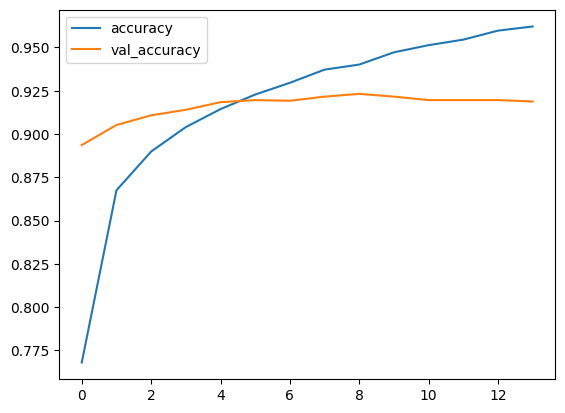

In [ ]:
model2_res[["accuracy","val_accuracy"]].plot()

<Axes: >

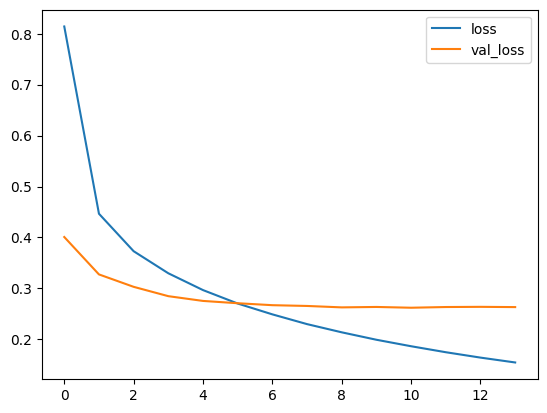

In [ ]:
model2_res[["loss","val_loss"]].plot()

<Axes: >

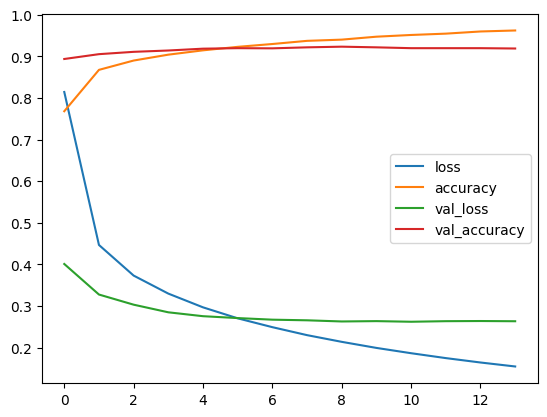

In [ ]:
model2_res.plot()

#Lets compare three models:


1.   model1 --> Baseline model
2.   model2 --> effieientnet model without data augumentation

1.   model3 --> effieientnet model without data augumentation









<h3>Lets built a function that creates a confusion matrix of a particular model</h3>

--> It takes two arguments<br>


> arg1:- true labels


> arg2:- predicted labels by the model





In [ ]:
def build_confusion_matrix(y_labels,pred_classes):
  cnm=confusion_matrix(y_labels,pred_classes)
  sb.heatmap(cnm/np.sum(cnm), annot=True,
            fmt='.2%', cmap='Blues',)

<h3>Lets built a function that gives a list of F1-scores of all classes of a particular model</h3>

--> It takes two arguments<br>


> arg1:- true labels


> arg2:- predicted labels by the model





In [ ]:
def model_F1_scores(y_labels,pred_classes):
  dic=classification_report(y_labels, pred_classes,output_dict=True)
  class_f1_scores = {}
  for k, v in dic.items():
    if k == "accuracy":
      break
    else:
      class_f1_scores[class_names[int(k)]] = v["f1-score"]
  return class_f1_scores

<h3>Lets built a function for visualizing fl_scores of all classes of a particular model</h3>

--> It takes 1 arguments<br>


> arg1:- list of f1-scores of all classes of a particular model





In [ ]:
def visualize_f1_scores(class_f1_scores):
  f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
  fig, ax = plt.subplots(figsize=(12, 12))
  scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
  ax.set_yticks(range(len(f1_scores)))
  ax.set_yticklabels(list(f1_scores["class_name"]))
  ax.set_xlabel("f1-score")
  ax.set_title("F1-Scores for Different Classes")
  def autolabel(rects):
    for rect in rects:
      width = rect.get_width()
      ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
              f"{width:.2f}",
              ha='center', va='bottom')
  autolabel(scores)


In [ ]:
base_model_preds=baseline_model.predict(test_data)
base_model_pred_classes=base_model_preds.argmax(axis=1)

79/79 [==============================] - 8s 103ms/step


In [ ]:
base_model_pred_classes

array([4, 1, 1, ..., 4, 7, 0])

In [ ]:
model1_preds=model_1.predict(test_data)
model1_pred_classes=model1_preds.argmax(axis=1)

79/79 [==============================] - 14s 114ms/step


In [ ]:
model1_pred_classes

array([0, 0, 7, ..., 9, 9, 9])

In [ ]:
model2_preds=model_2.predict(test_data)
model2_pred_classes=model2_preds.argmax(axis=1)

79/79 [==============================] - 11s 122ms/step


In [ ]:
model2_pred_classes

array([0, 0, 7, ..., 9, 9, 9])

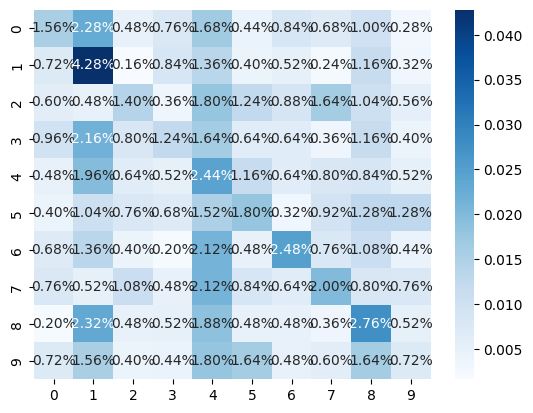

In [ ]:
build_confusion_matrix(y_labels,base_model_pred_classes)

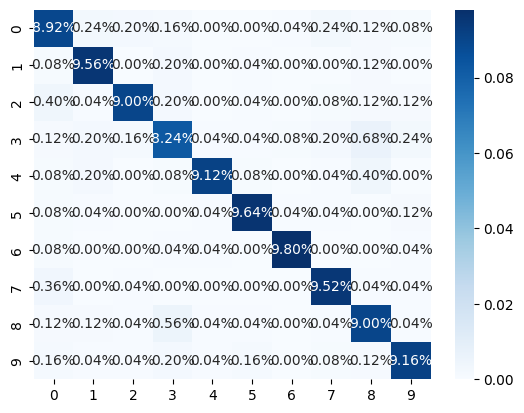

In [ ]:
build_confusion_matrix(y_labels,model1_pred_classes)

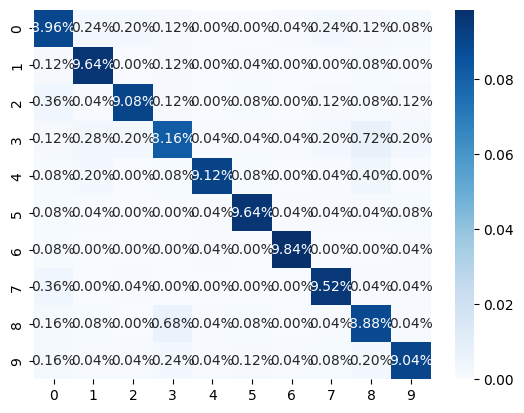

In [ ]:
build_confusion_matrix(y_labels,model2_pred_classes)

#Lets visualize our predictions:

In [ ]:
def test_random(model_no,class_names):
  plt.figure(figsize=(15, 10))
  for i in range(2):
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + "/" + class_name))
    filepath = test_dir+"/" + class_name + "/" + filename
    img = plt.imread(filepath)
    img=tf.image.resize(img,(224,224))
    pred_prob = model_no.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred_prob.argmax()]
    plt.subplot(1, 3, i+1)
    plt.imshow(img/255.)
    if class_name == pred_class:
      title_color = "g"
    else:
      title_color = "r"
    plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
    plt.axis(False);

note:-

1.   If the predictions are correct the title over the image will be displayed in green color
2.   If the predictions are correct the title over the image will be displayed in red color



<h3>Base model predictions:</h3>

1/1 [==============================] - 0s 19ms/step


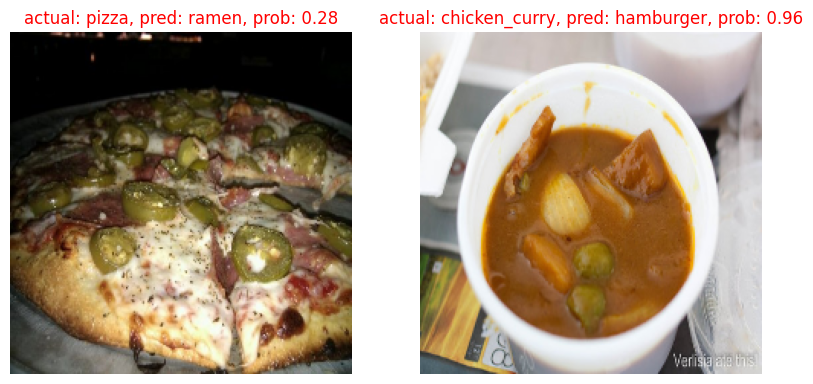

In [ ]:
test_random(baseline_model,class_names)

<h3>model2 predictions:</h3>

1/1 [==============================] - 0s 37ms/step


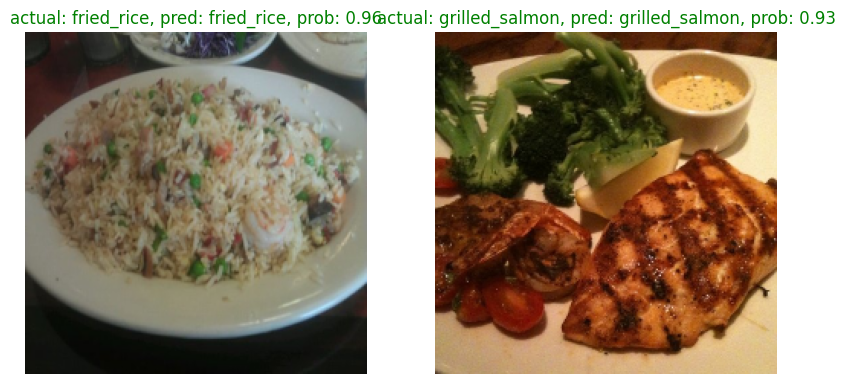

In [ ]:
test_random(model_1,class_names)

<h3>model 2 predictions:</h3>

1/1 [==============================] - 0s 26ms/step


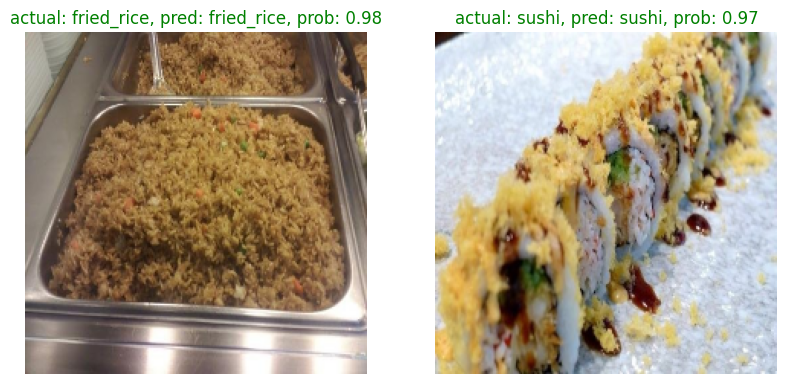

In [ ]:
test_random(model_2,class_names)

<h3>Evaluation of F1 scores of a model:</h3>
    We us e f1 scores because it provides accurate results for both balanced and imbalanced datasets, and takes into account both the precision and recall ability of the model.<br>
    F1 score will tell you the model’s balanced ability to both capture positive cases (recall) and be accurate with the cases it does capture (precision).

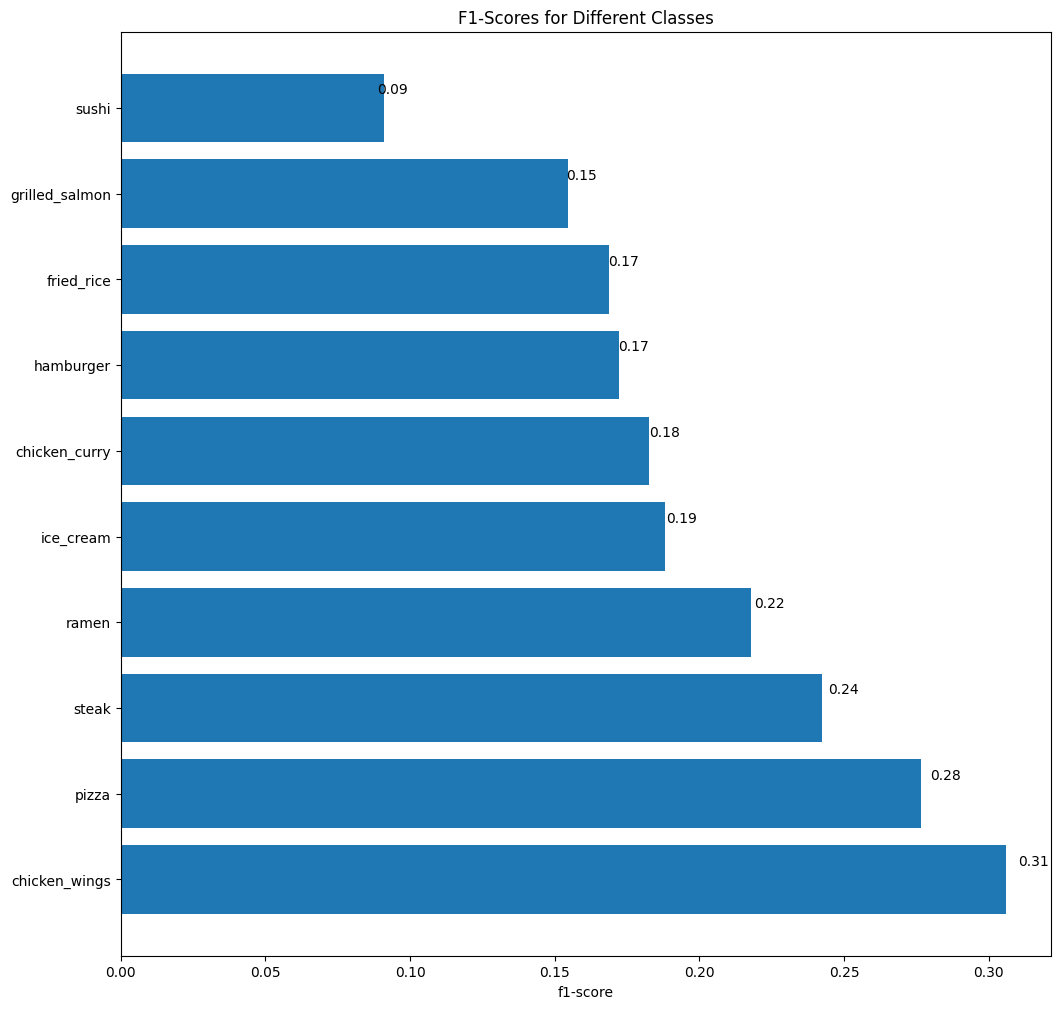

In [ ]:
visualize_f1_scores(model_F1_scores(y_labels,base_model_pred_classes))

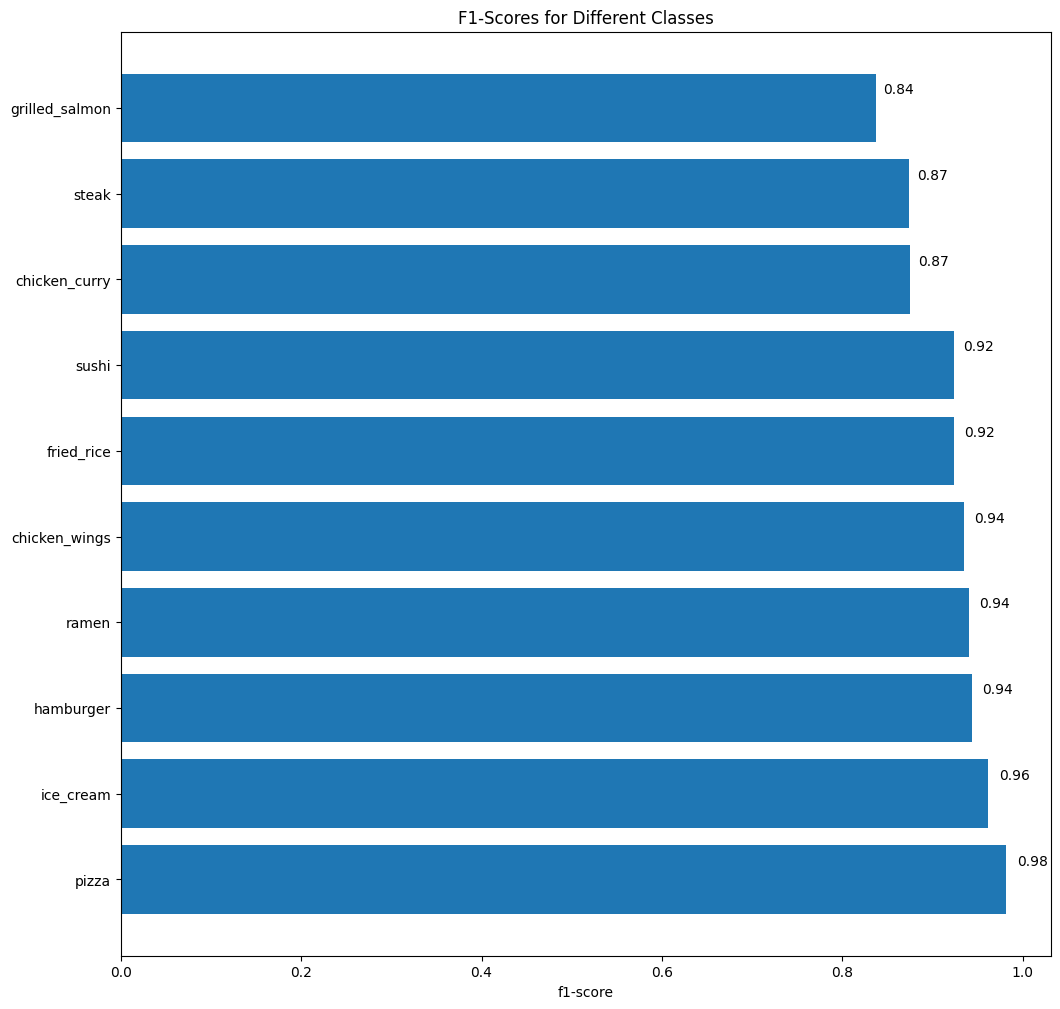

In [ ]:
visualize_f1_scores(model_F1_scores(y_labels,model1_pred_classes))

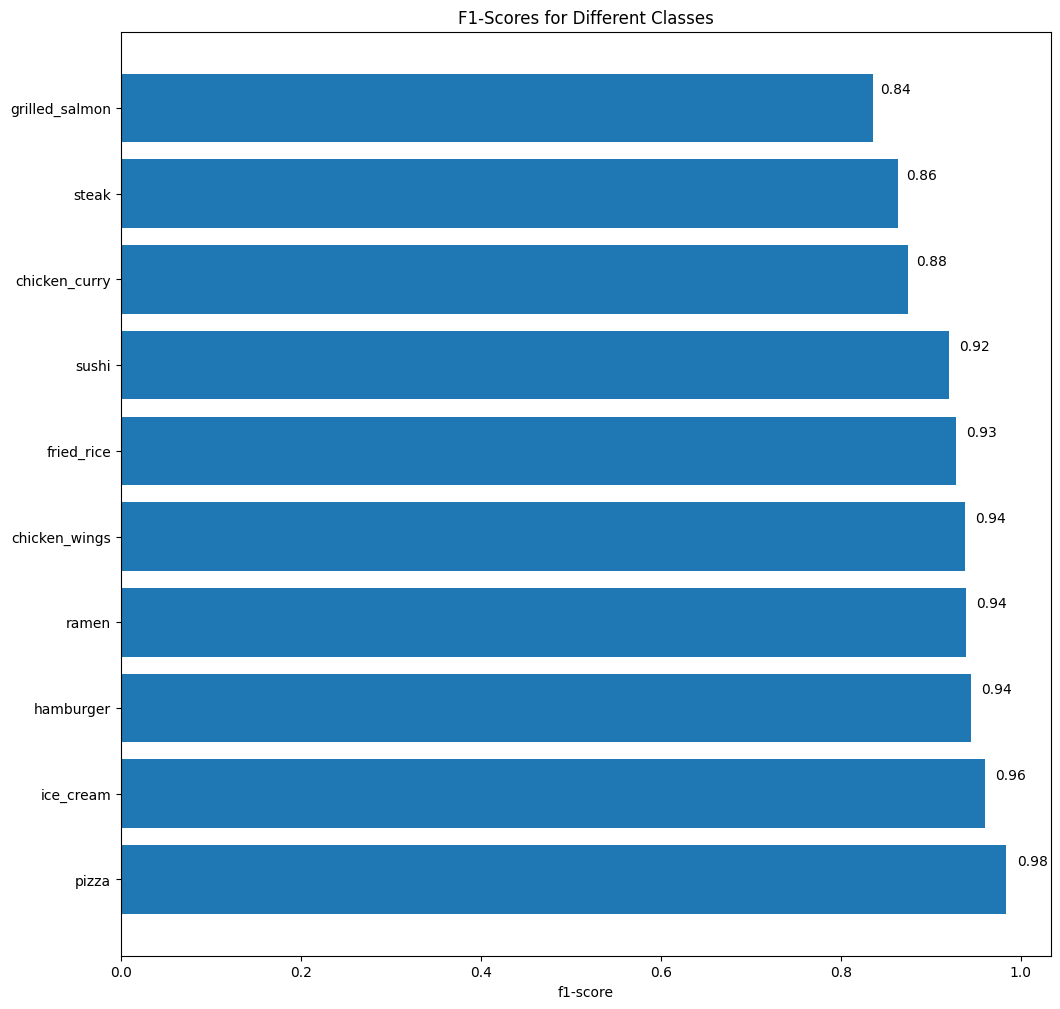

In [ ]:
visualize_f1_scores(model_F1_scores(y_labels,model2_pred_classes))

#Comparing accuracies of three models

In [ ]:
base_accuracy=accuracy_score(y_labels,base_model_pred_classes)
base_accuracy

0.2068

In [76]:
model1_accuracy=accuracy_score(y_labels,model1_pred_classes)
model1_accuracy

0.9196

In [ ]:
model2_accuracy=accuracy_score(y_labels,model2_pred_classes)
model2_accuracy

0.9188

Text(0.5, 1.0, 'Accuracies of three models')

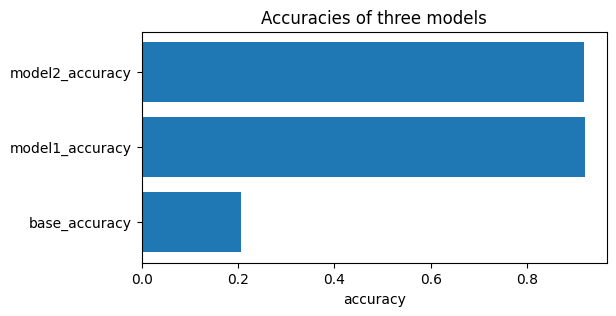

In [103]:
accuracies=[base_accuracy,model1_accuracy,model2_accuracy]
fig, ax = plt.subplots(figsize=(6, 3))
scores = ax.barh(range(len(accuracies)), accuracies)
ax.set_yticks(range(len(accuracies)))
ax.set_yticklabels(["base_accuracy","model1_accuracy","model2_accuracy"])
ax.set_xlabel("accuracy")
ax.set_title("Accuracies of three models")

#Testing on an image from internet

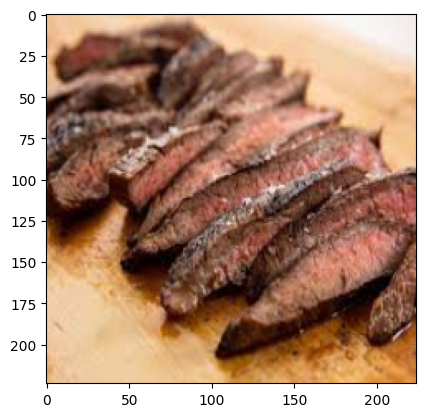

In [93]:
new_img=plt.imread("/content/net_img.jpg")
new_img=tf.image.resize(new_img,(224,224))
new_img=new_img*(1./255)
plt.imshow(new_img)

In [94]:
prediction_1=model_1.predict(tf.expand_dims(new_img,axis=0))
label=class_names[prediction_1.argmax()]
label

1/1 [==============================] - 0s 26ms/step


'steak'

In [95]:
prediction_2=model_2.predict(tf.expand_dims(new_img,axis=0))
label=class_names[prediction_2.argmax()]
label

1/1 [==============================] - 0s 38ms/step


'steak'

In [96]:
prediction_3=baseline_model.predict(tf.expand_dims(new_img,axis=0))
label=class_names[prediction_3.argmax()]
label

1/1 [==============================] - 0s 19ms/step


'ice_cream'